/var/folders/3v/pvqv7b3n30x2853fxg80ybpm0000gn/T/ipykernel_3543/4062999633.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Datasets/movies_metadata.csv")


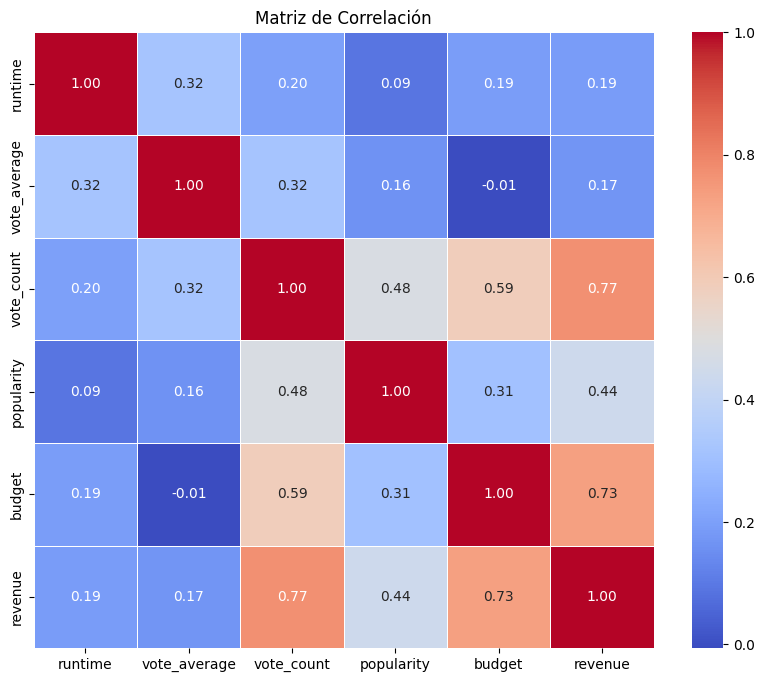

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Para mejorar la visualización

# Cargar dataset
data = pd.read_csv("Datasets/movies_metadata.csv")

# Seleccionar solo las columnas necesarias
data = data[['adult', 'production_companies', 'genres', 'runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']]

# Convertir 'budget' y 'revenue' a valores numéricos
data["budget"] = pd.to_numeric(data["budget"], errors='coerce')
data["revenue"] = pd.to_numeric(data["revenue"], errors='coerce')

# Eliminar filas con NaN
data = data.dropna()

# Eliminar valores donde 'budget' o 'revenue' sean 0 (manteniendo coherencia entre ambas columnas)
data = data[(data["budget"] > 0) & (data["revenue"] > 0)]

# Matriz de correlación
corr = data[['runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']].corr()

# Visualizar matriz de correlación mejorada
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Filtrar solo budget y revenue para análisis posterior
data2 = data[['budget', 'revenue']]


Gestion de outliers

In [88]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Convertir a numérico
data2["budget"] = pd.to_numeric(data2["budget"], errors="coerce")
data2["revenue"] = pd.to_numeric(data2["revenue"], errors="coerce")

# Eliminar filas con valores NaN generados por la conversión
data2 = data2.dropna()

def eliminar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    return df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]

def eliminar_outliers_zscore(df, col):
    z_scores = np.abs(zscore(df[col]))
    return df[z_scores < 3]

# Primero eliminamos outliers por IQR y luego por Z-score, pero en conjunto
data2 = eliminar_outliers_iqr(data2, "budget")
data2 = eliminar_outliers_iqr(data2, "revenue")
data2 = eliminar_outliers_zscore(data2, "budget")
data2 = eliminar_outliers_zscore(data2, "revenue")

# Eliminar ceros en ambas columnas en conjunto
data2 = data2[(data2["budget"] > 0) & (data2["revenue"] > 0)]

# Ahora extraemos budget y revenue de nuevo
budget_limpio = data2["budget"]
revenue_limpio = data2["revenue"]

print(f"Nueva longitud de budget_limpio: {len(budget_limpio)}")
print(f"Nueva longitud de revenue_limpio: {len(revenue_limpio)}")



Nueva longitud de budget_limpio: 3224
Nueva longitud de revenue_limpio: 3224


In [58]:
# Filtrar solo valores positivos antes de aplicar Box-Cox
budget_limpio = budget_limpio[budget_limpio > 0]
revenue_limpio = revenue_limpio[revenue_limpio > 0]


In [63]:
print("Primeros índices de budget_limpio:", budget_limpio.index[:5])
print("Primeros índices de revenue_limpio:", revenue_limpio.index[:5])



Primeros índices de budget_limpio: Index([17, 24, 26, 28, 35], dtype='int64')
Primeros índices de revenue_limpio: Index([17, 24, 26, 28, 35], dtype='int64')


In [62]:
data2 = data2.loc[(data2["budget"] > 0) & (data2["revenue"] > 0)]

# Extraer las columnas de nuevo asegurando que tienen el mismo índice
budget_limpio = data2["budget"]
revenue_limpio = data2["revenue"]


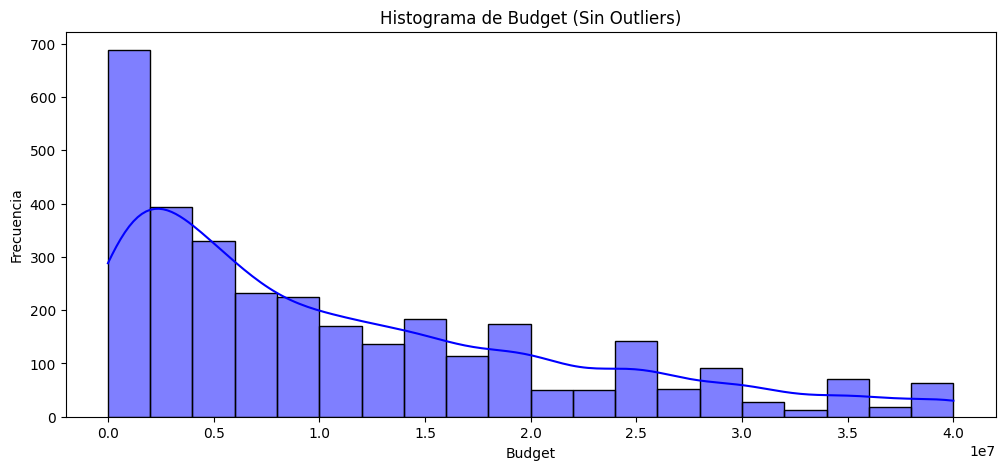

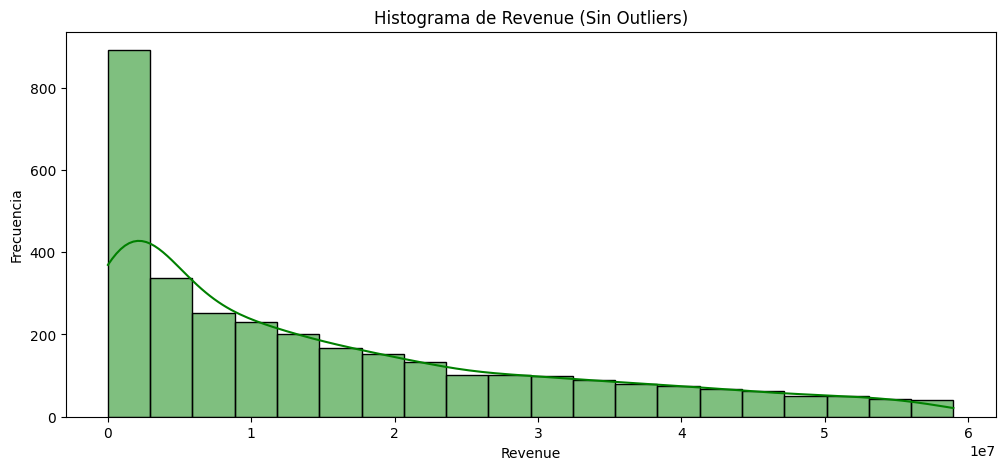

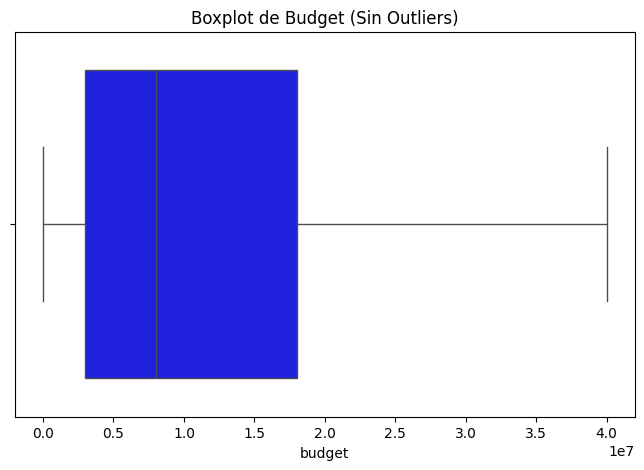

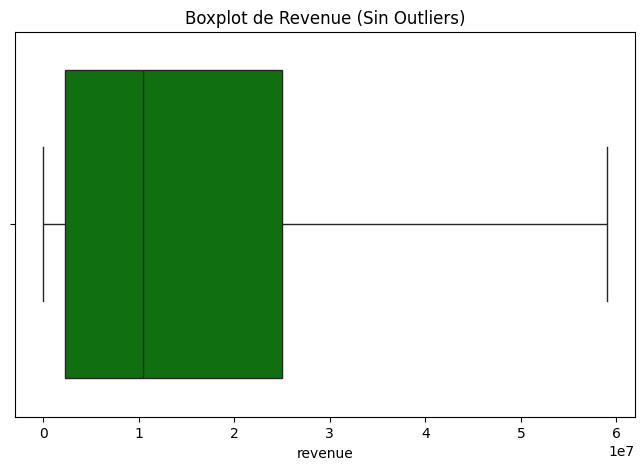

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que df_sin_outliers esté bien definido
df_sin_outliers = data2.loc[budget_limpio.index.intersection(revenue_limpio.index)]

# Verificar que las columnas existen en el dataframe
if "budget" in df_sin_outliers.columns and "revenue" in df_sin_outliers.columns:
    # Crear histogramas para 'budget' y 'revenue'
    plt.figure(figsize=(12, 5))
    sns.histplot(df_sin_outliers["budget"], kde=True, color="blue")
    plt.title("Histograma de Budget (Sin Outliers)")
    plt.xlabel("Budget")
    plt.ylabel("Frecuencia")
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.histplot(df_sin_outliers["revenue"], kde=True, color="green")
    plt.title("Histograma de Revenue (Sin Outliers)")
    plt.xlabel("Revenue")
    plt.ylabel("Frecuencia")
    plt.show()

    # Crear boxplots para visualizar posibles valores extremos
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_sin_outliers["budget"], color="blue")
    plt.title("Boxplot de Budget (Sin Outliers)")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_sin_outliers["revenue"], color="green")
    plt.title("Boxplot de Revenue (Sin Outliers)")
    plt.show()

else:
    print("Las columnas 'budget' o 'revenue' no están en el dataframe.")




eliminar los outliers

In [90]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Convertir a numérico y manejar NaN
data2['budget'] = pd.to_numeric(data2['budget'], errors='coerce')
data2['revenue'] = pd.to_numeric(data2['revenue'], errors='coerce')

# Eliminar filas con NaN en 'budget' o 'revenue'
data2 = data2.dropna(subset=['budget', 'revenue'])

# Eliminar ceros antes de calcular outliers
data2 = data2[(data2['budget'] > 0) & (data2['revenue'] > 0)]

def eliminar_outliers_iqr(column):
    """Elimina outliers usando el método del rango intercuartil (IQR)."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    datos_limpiados = column[(column >= limite_inferior) & (column <= limite_superior)]
    
    print(f"Outliers eliminados con IQR en {column.name}: {column.shape[0] - datos_limpiados.shape[0]}")
    return datos_limpiados

def eliminar_outliers_zscore(column):
    """Elimina outliers usando el método del Z-score (umbral de 3)."""
    z_scores = np.abs(zscore(column))
    datos_limpiados = column[z_scores < 3]
    
    print(f"Outliers eliminados con Z-score en {column.name}: {column.shape[0] - datos_limpiados.shape[0]}")
    return datos_limpiados

# Aplicar eliminación de outliers a 'budget' y 'revenue'
budget_limpio = eliminar_outliers_iqr(data2['budget'])
budget_limpio = eliminar_outliers_zscore(budget_limpio)

revenue_limpio = eliminar_outliers_iqr(data2['revenue'])
revenue_limpio = eliminar_outliers_zscore(revenue_limpio)

# Crear un DataFrame limpio con solo las filas que coinciden en ambos conjuntos
data_limpio = data2.loc[budget_limpio.index.intersection(revenue_limpio.index)].reset_index(drop=True)

# Verificar que no haya ceros en los datos finales
print(f"Ceros en budget_limpio: {(data_limpio['budget'] == 0).sum()}")
print(f"Ceros en revenue_limpio: {(data_limpio['revenue'] == 0).sum()}")

# Mostrar las primeras filas del DataFrame limpio
print(data_limpio.head())


Outliers eliminados con IQR en budget: 0
Outliers eliminados con Z-score en budget: 0
Outliers eliminados con IQR en revenue: 0
Outliers eliminados con Z-score en revenue: 0
Ceros en budget_limpio: 0
Ceros en revenue_limpio: 0
       budget     revenue
0   4000000.0   4300000.0
1   3600000.0  49800000.0
2  12000000.0  27400000.0
3  18000000.0   1738611.0
4  11000000.0  39363635.0


asegurarse de que loa datos sean positivos

In [91]:
# Verificar que no haya ceros en los datos limpios
print(f"Ceros en budget_limpio: {(budget_limpio == 0).sum()}")
print(f"Ceros en revenue_limpio: {(revenue_limpio == 0).sum()}")


Ceros en budget_limpio: 0
Ceros en revenue_limpio: 0


Aplicar la transformación Box-Cox:

In [92]:
from scipy.stats import boxcox

# Filtrar solo valores positivos para evitar errores con Box-Cox
budget_limpio = budget_limpio[budget_limpio > 0]
revenue_limpio = revenue_limpio[revenue_limpio > 0]

# Aplicar la transformación Box-Cox
budget_boxcox, lambda_budget = boxcox(budget_limpio)
revenue_boxcox, lambda_revenue = boxcox(revenue_limpio)

print(f"Lambda óptimo para budget: {lambda_budget:.4f}")
print(f"Lambda óptimo para revenue: {lambda_revenue:.4f}")


Lambda óptimo para budget: 0.3379
Lambda óptimo para revenue: 0.3017


Calcular la asimetría antes y después de Box-Cox:

In [93]:
from scipy.stats import skew

# Calcular asimetría antes y después de Box-Cox
asimetria_antes_budget = skew(budget_limpio, nan_policy='omit')
asimetria_despues_budget = skew(budget_boxcox, nan_policy='omit') if len(budget_boxcox) > 0 else float('nan')

asimetria_antes_revenue = skew(revenue_limpio, nan_policy='omit')
asimetria_despues_revenue = skew(revenue_boxcox, nan_policy='omit') if len(revenue_boxcox) > 0 else float('nan')

# Mostrar resultados redondeados
print(f"Asimetría antes de Box-Cox (Budget): {asimetria_antes_budget:.2f}")
print(f"Asimetría después de Box-Cox (Budget): {asimetria_despues_budget:.2f}")
print(f"Asimetría antes de Box-Cox (Revenue): {asimetria_antes_revenue:.2f}")
print(f"Asimetría después de Box-Cox (Revenue): {asimetria_despues_revenue:.2f}")


Asimetría antes de Box-Cox (Budget): 0.99
Asimetría después de Box-Cox (Budget): -0.24
Asimetría antes de Box-Cox (Revenue): 0.98
Asimetría después de Box-Cox (Revenue): -0.30


Visualizar los histogramas y compararlos antes y después de Box-Cox:

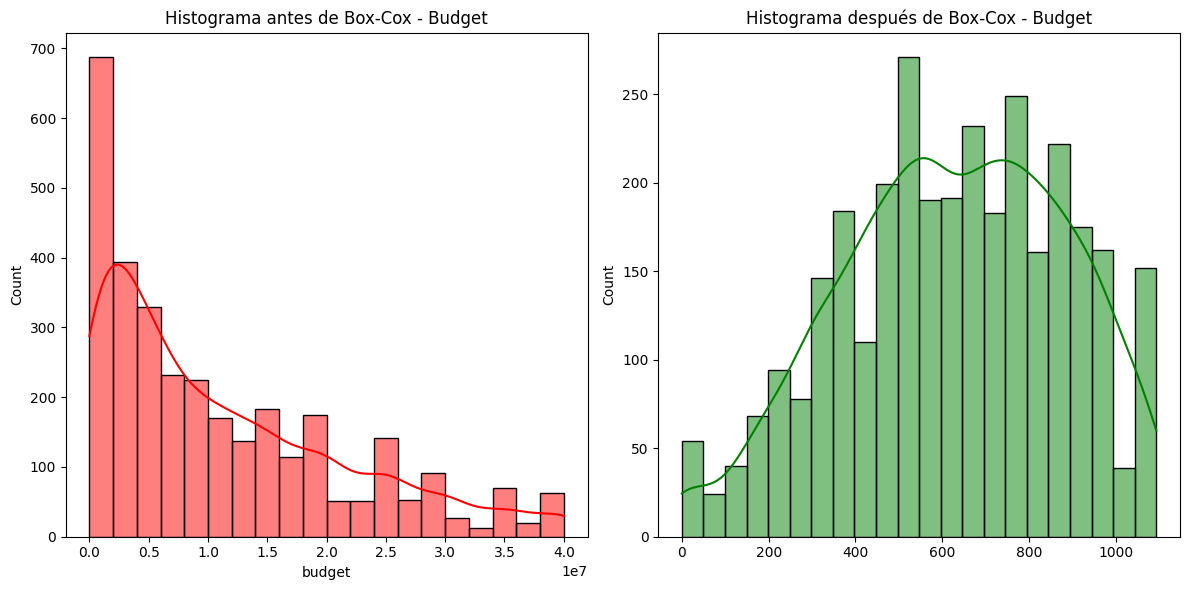

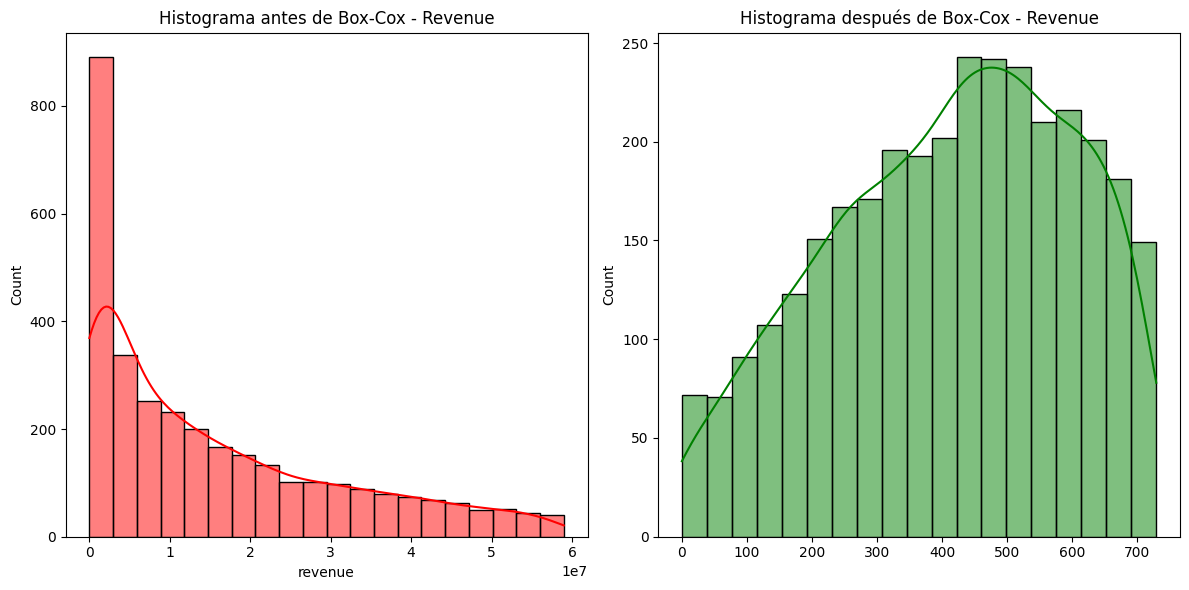

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que los datos sean Series de Pandas
budget_boxcox_series = pd.Series(budget_boxcox, index=budget_limpio.index)
revenue_boxcox_series = pd.Series(revenue_boxcox, index=revenue_limpio.index)

# Función para comparar distribuciones antes y después de Box-Cox
def comparar_distribuciones_boxcox(original, transformado, titulo):
    plt.figure(figsize=(12, 6))

    # Histograma antes de Box-Cox
    plt.subplot(1, 2, 1)
    sns.histplot(original, kde=True, color='red')
    plt.title(f'Histograma antes de Box-Cox - {titulo}')

    # Histograma después de Box-Cox
    plt.subplot(1, 2, 2)
    sns.histplot(transformado, kde=True, color='green')
    plt.title(f'Histograma después de Box-Cox - {titulo}')

    plt.tight_layout()
    plt.show()

# Comparar 'budget' y 'revenue' antes y después de Box-Cox
comparar_distribuciones_boxcox(budget_limpio, budget_boxcox_series, 'Budget')
comparar_distribuciones_boxcox(revenue_limpio, revenue_boxcox_series, 'Revenue')


Calcular correlacion de las variables

In [95]:
print(f"Longitud de budget_boxcox: {len(budget_boxcox)}")
print(f"Longitud de revenue_boxcox: {len(revenue_boxcox)}")

# Verificar si las longitudes coinciden
if len(budget_boxcox) == len(revenue_boxcox):
    print("✅ Ambas transformaciones tienen la misma longitud.")
else:
    print("⚠️ Las longitudes no coinciden. Puede haber datos faltantes.")


Longitud de budget_boxcox: 3224
Longitud de revenue_boxcox: 3224
✅ Ambas transformaciones tienen la misma longitud.


Paso 3: Calcular la correlacción de las variables 

Matriz de correlación:
           Budget   Revenue
Budget   1.000000  0.424465
Revenue  0.424465  1.000000


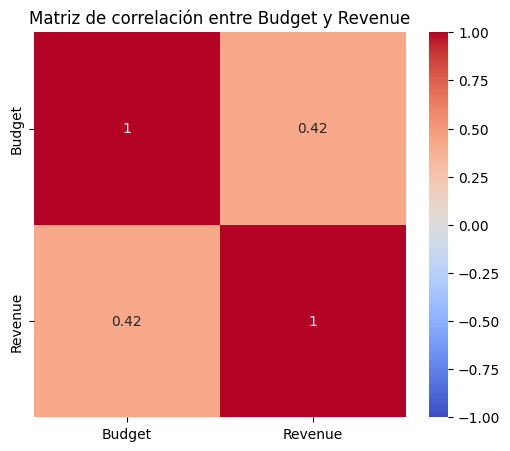

In [96]:
import pandas as pd

# Crear un DataFrame con las columnas 'budget' y 'revenue'
df_sin_outliers = pd.DataFrame({
    "Budget": budget_limpio,
    "Revenue": revenue_limpio
})

# Calcular la matriz de correlación
correlation_matrix = df_sin_outliers.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Para visualizarla mejor, puedes crear un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación entre Budget y Revenue")
plt.show()


Paso 4: Dividir el conjunto entre entrenamiento y prueba

In [97]:
from sklearn.model_selection import train_test_split

# Definir X (features) y y (target)
X = df_sin_outliers["Budget"].values.reshape(-1, 1)  # Convertir a una matriz columna
y = df_sin_outliers["Revenue"].values

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test, y_test): {X_test.shape}, {y_test.shape}")


Tamaño del conjunto de entrenamiento (X_train, y_train): (2579, 1), (2579,)
Tamaño del conjunto de prueba (X_test, y_test): (645, 1), (645,)


Paso 5: Entrenar el modelo de Regresión Lineal

In [98]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento (X_train, y_train)
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba (X_test)
y_pred = modelo.predict(X_test)

# Mostrar algunas de las predicciones
print(f"Predicciones: {y_pred[:10]}")  # Muestra las primeras 10 predicciones


Predicciones: [18035343.53960782 27423295.57620532 20538797.41603383 26171568.63799233
 11150845.37943632 12715504.05220257 13654299.25586232 12402572.31764932
  8694331.26319331 19912933.94692732]


Paso 6: Evaluar el modelo

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo con métricas
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

# Imprimir los resultados
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 191452212097426.00
Coeficiente de determinación (R²): 0.22


Paso 7: Visualizar la regresión

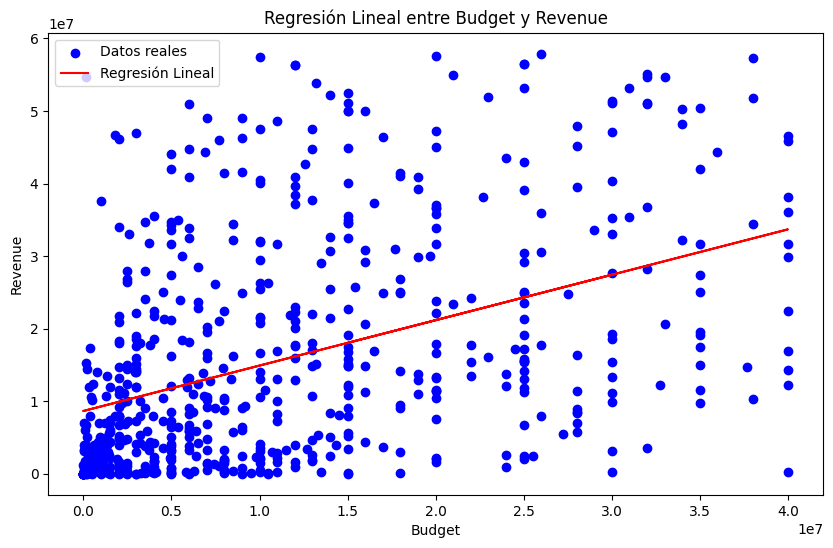

In [100]:
import matplotlib.pyplot as plt

# Suponiendo que 'X' es la variable independiente (por ejemplo, 'budget') y 'y' es la variable dependiente (por ejemplo, 'revenue')
plt.figure(figsize=(10,6))

# Crear gráfico de dispersión de los datos reales
plt.scatter(X_test, y_test, color="blue", label="Datos reales")

# Graficar la línea de regresión utilizando las predicciones del modelo
plt.plot(X_test, y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Regresión Lineal entre Budget y Revenue")
plt.legend()

# Mostrar el gráfico
plt.show()
